In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

# Lecture One

This is a jupyter notebook. It let's you mix code, figures, and text. You can find all the material (including this notebook) on: https://github.com/wildtreetech/advanced-comp-2017

All the examples and exercises will be in python. The GitHub repository contains instructions on how to get setup on your machine.

Let's dive in, what is all this machine-learning about? To start off we create a toy dataset. Each observation has only two features (variables). This makes it easy to visualise (most montiors are only 2D) and means we will not spend time waiting for the computer to crunch numbers. Most of the intuition we gather from these small datasets transfers directly to larger ones.

Randomly distributed blobs, either red or blue:

In [2]:
from sklearn.datasets import make_blobs

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

The features (or observations) are stored in a two dimensional array named, by convention `X`. The label (the thing we are trying to predict) is stored in a one dimensional array named, by convention, `y`. Let's inspect them in a bit more detail:

In [3]:
X[:5]

array([[ -4.21978613,  -1.71762081],
       [ -8.90204992,   7.78548117],
       [ -2.58120774,  10.01781903],
       [ -8.43029062,  -6.81154662],
       [  9.04375197,   5.06142105]])

In [4]:
y[:5]

array(['b', 'r', 'r', 'r', 'b'], 
      dtype='<U1')

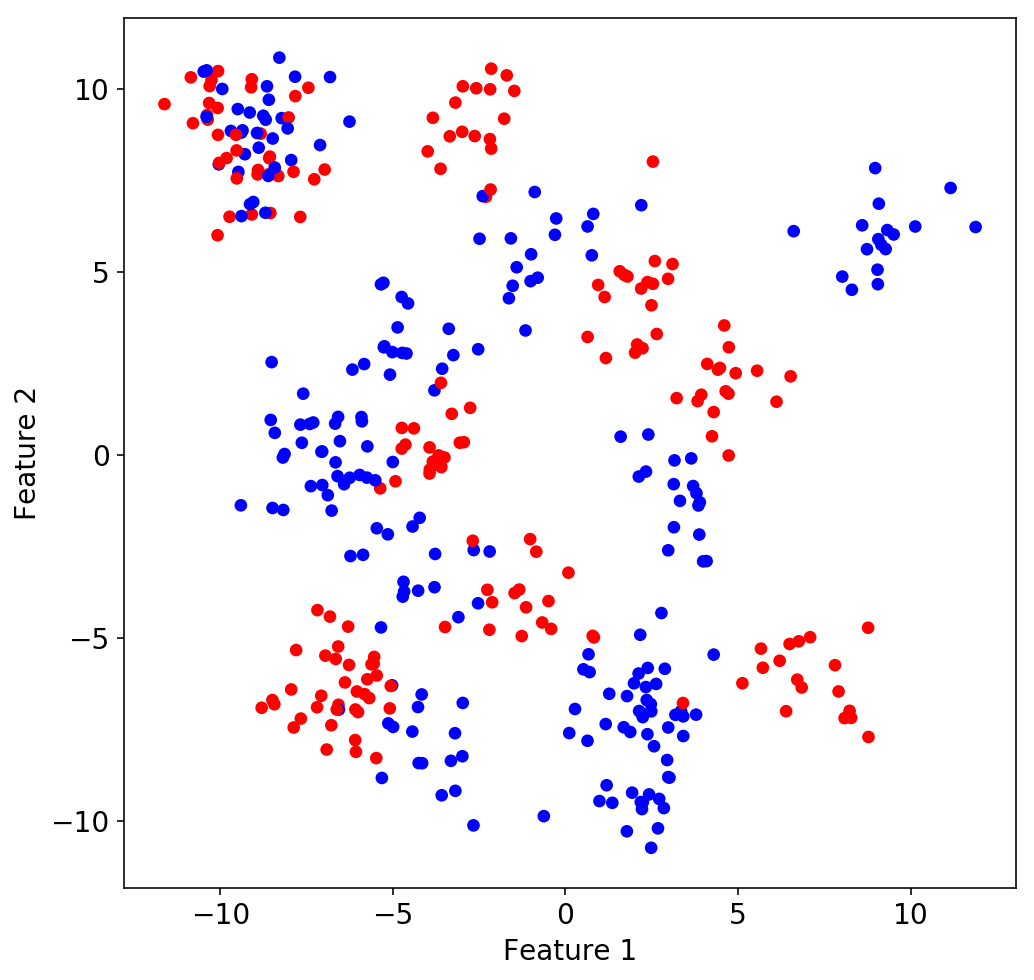

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

What if we received a new observation at `[3., -2.5]`. What would you predict its colour to be?

One good way to make predictions is to look around the neighbourhood of the new point and assign it a label based on its neighbours. This is exactly the strategy of the `KNeighborsClassifier`. Let's do that:

In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

print(clf.predict([[3., -2.5]]))

['b']


What about at `[3., +2.5]`?

In [7]:
print(clf.predict([[3., +2.5]]))

['r']


If we keep doing evaluating the classifier at every point in the plane we will end up with a plot like the following. It shows the decision surface of the classifier.

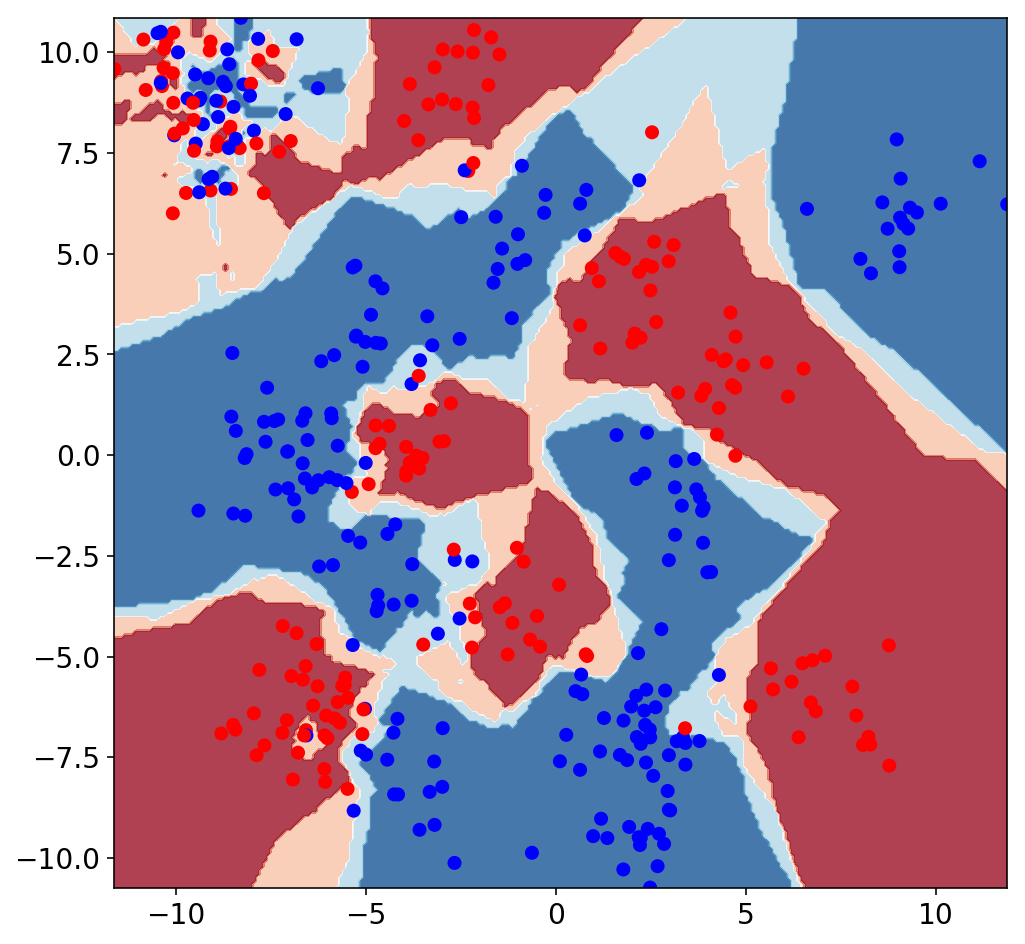

In [8]:
from utils import plot_surface

plot_surface(clf, X, y)

## Notation

One observation (or sample) $X^T = (X_0, X_1, ..., X_p)$ is a vector with $p$ components. These are the $p$ input variables. Together the $N$ samples in our dataset form a $N\times p$ matrix $\mathbf{X}$. To distinguish the $i$th feature in $x$ from the $i$th observation in $\mathbf{x}$ only vectors of length $N$ will be bold. Therefore $x_i$ is a scalar (the value of the $i$th variable for observation $x$), and $\mathbf{x}_i$ is a vector (the $i$th observation).

Regression relates *input variables* $X\in \mathbb{R}^p$ to *continous outputs* $y\in\mathbb{R}$

Classification relates *input variables* $X\in \mathbb{R}^p$ to *categorical outputs* $y\in\mathcal{G}$. $\mathcal{G}$ is a finite set, for example $\mathcal{G} = \{-1, 1\}$ or $\mathcal{G} = \{\mathrm{car}, \mathrm{house}, \mathrm{dog}\}$.


## General problem statement

Data comes as a finite learning set ${\cal L} = (\mathbf{X}, y)$ where
* Input samples are given as an array $\mathbf{X}$ of shape (n_samples $\times$ n_features), with values in $\mathcal{X}$;
* (Classification) Output values are given as an array $y$, taking symbolic values in ${\mathcal Y}$.
* (Regression) Output values are given as an array $y$, taking real values in ${\mathcal Y}$.

The goal of supervised classification is to build an estimator $f: {\cal X} \mapsto {\cal Y}$.

We are not interested in just any function $f$.

We are looking for
$$
f^* = \arg \min_f Err(f) = \mathbb{E}_{X,Y}[ L(Y, f(X)) ]
$$
where $L$ is a loss function, for example,

* the zero-one loss  $L(Y,\hat{Y}) = 1(Y \neq \hat{Y})$ for classification;
* the squared error $L(Y,\hat{Y}) = (Y-\hat{Y})^2$ for regression.


## Linear regression

Another machine-learning model that is easy to understand and probably familiar to most here under a less exciting name is: linear regression.

You probably know it as "fitting a line to my data".

Despite it's simplicity and age it is a successful method that earns a lot of people a lot of money. A true workhorse. It also serves as a good jumping off point for more modern and complex methods. We can introduce all the essential nomenclature and cover technicalities using a simple model before focussing on more complex methods.

_Note: we are leaving classification behind for the moment and switching to regression._

Linear regression in it's most simple form is truly simple. Given an observation $X^T = (X_0, X_1, ..., X_p)$ with $p$ inputs, we predict $Y$ using the model:

$$
\hat Y = \hat \beta_0 + \sum_{j=1}^p X_j \hat \beta_j
$$

To use this model we need to find a way to use the data to estimate the coefficients $\beta_i$. We do this by fitting the model to our data $\mathcal{L}$, the learning set.

We obtain estimates for the true but unknown parameters $\beta_i$. To separate the estimates from the true values we give them a ^: $\hat\beta_i$. To find estimates we use the loss function $L(Y, f(x))$ that penalises incorrect predictions. In the case of regression a popular choice is the squared error:
$$
L = (Y,\hat{Y}) = (Y-\hat{Y})^2
$$
where $\hat Y = \hat \beta_0 + \sum_{j=1}^p X_j \hat \beta_j$. Writing it as above implies a sum over all $N$ observations, more explicitly:
$$
L(\beta) = \sum_i^N \left( y_i - x_i^T\beta \right)^2
$$

How do you minimise $L$? In this case either some linear algebra or with a numerical minimiser. In general the method for minimising the loss function is part of the classifier or regressor you are using.

How does this look in practice, some simple data:

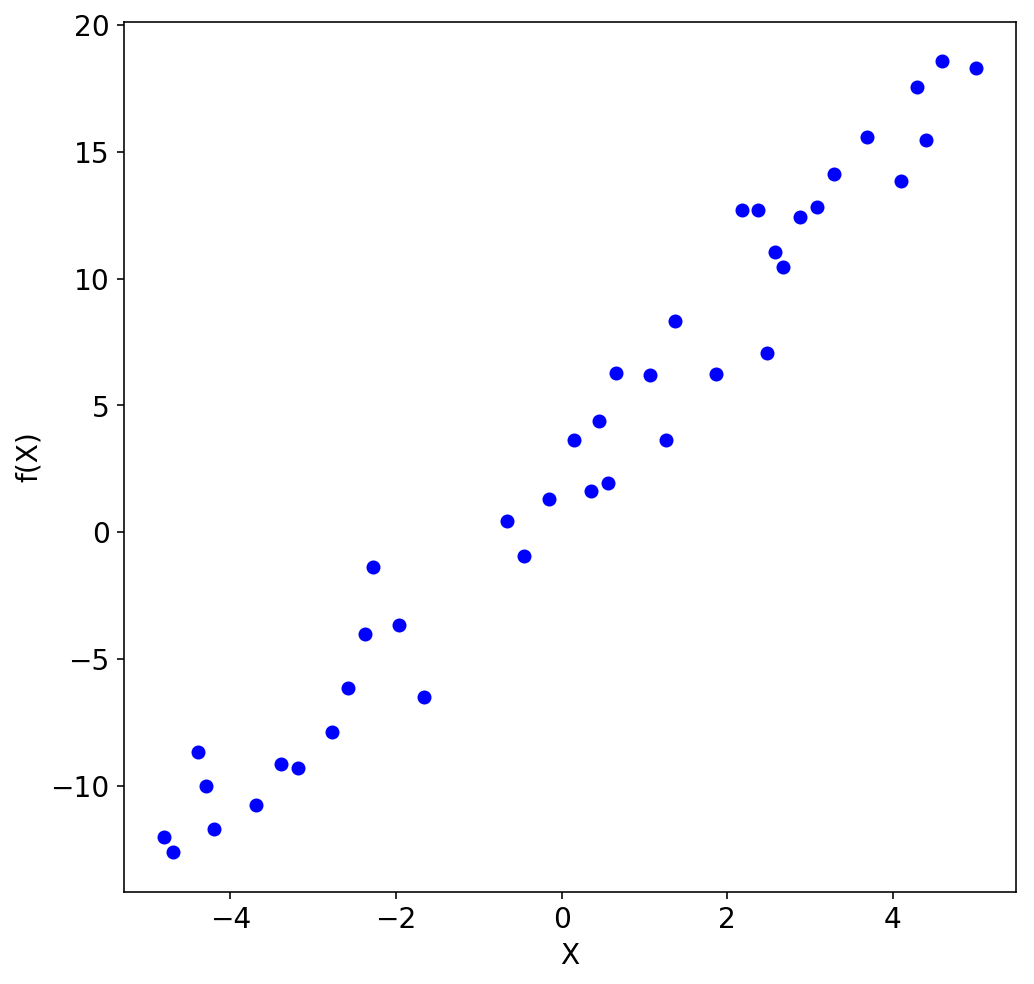

In [9]:
def f(x, beta0=2.19, beta1=3.141):
    return beta0 + beta1 * x + rng.randn(x.shape[0]) * 2.

x = np.linspace(-5, 5, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
X = np.sort(x[:40])
y = f(X)

X = X.reshape(-1, 1)

plt.plot(X, y, 'ob')
plt.xlabel("X")
plt.ylabel("f(X)");

We now have our learning set $\mathcal{L}$, the pairs of `X` (input samples) and `y` (output values).

To see what the loss function looks like we can calculate its value on a grid of possible values of $\beta_0$ and $\beta_1$.

best coefficients: [ 2.52631579  3.15789474] MSE: 2.99604870222


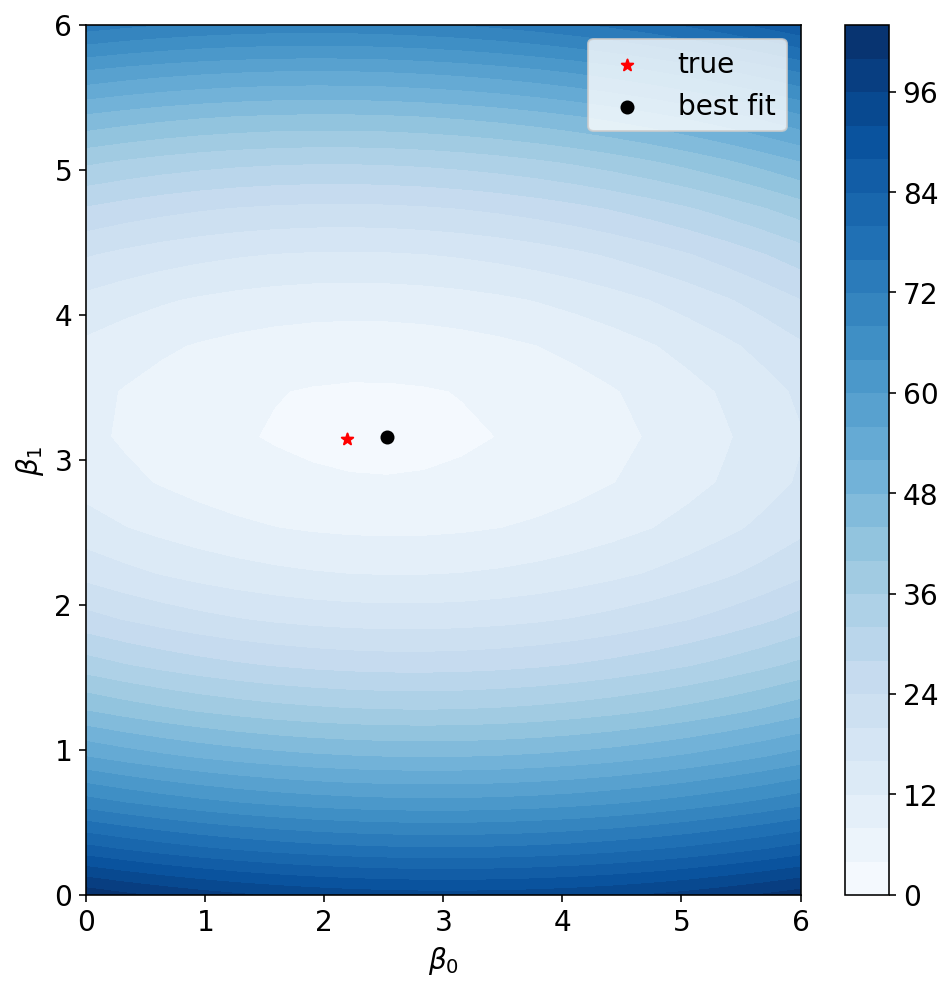

In [10]:
def MSE(X, y, coefficients):
    y = y.reshape(-1, 1)
    losses = []
    for beta0, beta1 in coefficients:
        model = beta0 + X*beta1
        residual = y - model

        L = np.sum(residual**2) / X.shape[0]
        losses.append(L)
    return np.array(losses)

# build our grid of values
n_steps = 20
beta0s, beta1s = np.meshgrid(np.linspace(0, 6, n_steps),
                             np.linspace(0, 6, n_steps))
coefficients = np.c_[beta0s.ravel(), beta1s.ravel()]

MSEs = MSE(X, y, coefficients)
idx = np.argmin(MSEs)
print('best coefficients:', coefficients[idx], 'MSE:', MSEs[idx])

# plotting
MSEs = MSEs.reshape(beta0s.shape)
plt.contourf(beta0s, beta1s, MSEs, 30, cmap=plt.cm.Blues, vmin=0)
plt.colorbar()
plt.scatter([2.19], [3.141], c='r', marker='*', label='true')
# plot the grid points
#plt.scatter(beta0s.ravel(), beta1s.ravel(), marker='.', c='k')
plt.scatter(*coefficients[idx], c='k', marker='o', label='best fit')
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')
plt.legend(loc='best');

The linear model can be solved using ordinary least squares. This means you do not have to run a numerical minimiser, instead you do some linear algebra to solve directly for the coefficients. We will come back to different optimisers when we discuss neural networks.

In a real world application you can use the `LinearRegression` regressor from scikit-learn:

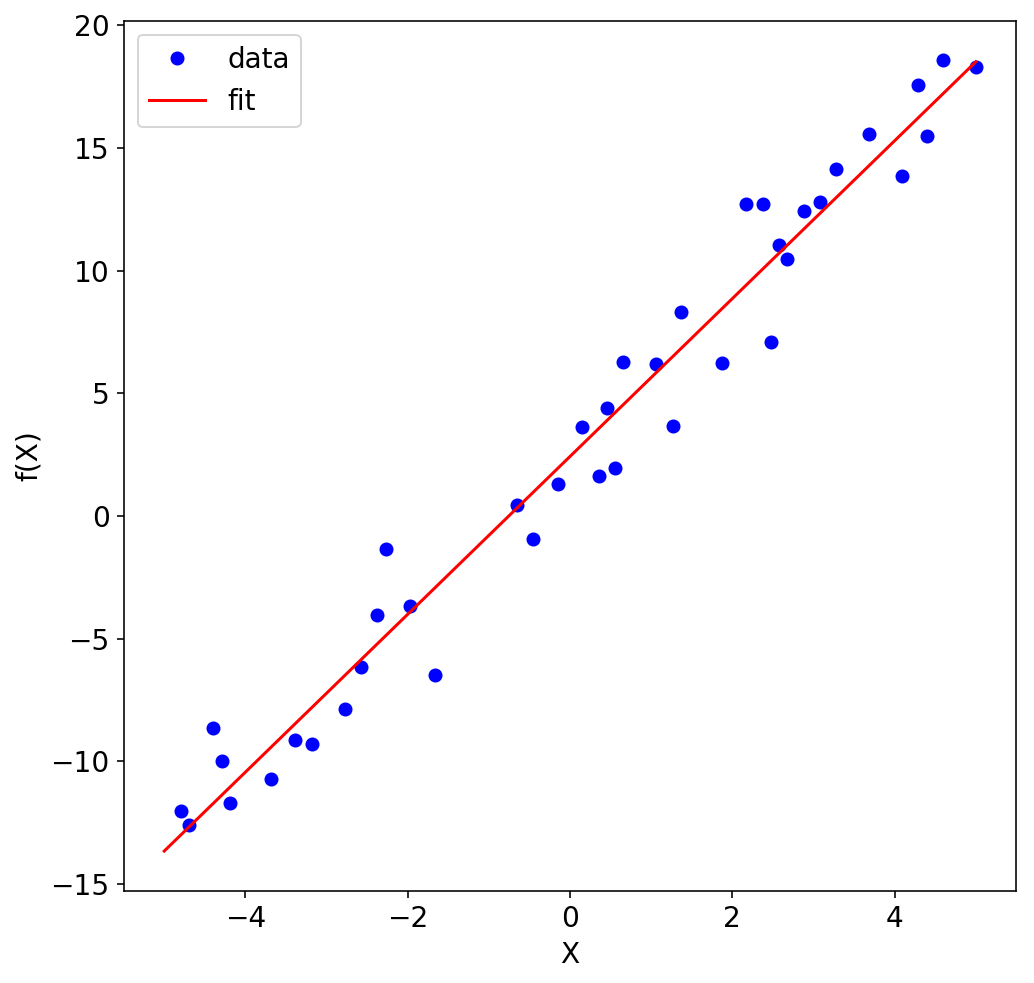

In [11]:
from sklearn.linear_model import LinearRegression

line = np.linspace(-5, 5, 100).reshape(-1, 1)

rgr = LinearRegression()
rgr.fit(X, y)

plt.plot(X, y, 'ob', label='data')
plt.plot(line, rgr.predict(line), '-r', label='fit')
plt.legend(loc='best')
plt.xlabel("X")
plt.ylabel("f(X)");

In [12]:
print('Weight coefficients (beta1): ', rgr.coef_)
print('y-axis intercept (beta0): ', rgr.intercept_)

Weight coefficients (beta1):  [ 3.21827894]
y-axis intercept (beta0):  2.42536720229


As you can see scikit-learn takes care of minimising the loss function of a classifier or regressor. The coefficients and y-axis intercept we obtain from the fit are close to the values we used to generate the data.


## Summary

The basic linear model is not very exciting and a lot of you will already be familiar with it. This is good. It means you can now map the terms learning set, loss function, fitting a model, and estimator to concepts you already know. These terms will keep reappearing and half the work in machine-learning is identifying how to map your problem onto these concepts.

---

## Goodness of fit

How do we measure how well our model is performing? How do we make a prediction for how well our model will perform on new, unseen data?

For a simple linear model like this we could count the number of degrees of freedom and the data points. This has the disadvantage that it uses the same data that we used to fit the model, so it is not unseen data. Furthermore it does not work in general for all machine-learning methods.

Instead we split our dataset into two. One is used to fit or train the model. The other is used only to measure the performance of the model. This estimate of the performance is then used to predict the performance on new, unseen data.

Mathematically speaking: we have a learning set $\mathcal{L}$ which we split into a training set $\mathcal{T}$ and a testing set $\mathcal{S}$.

In [13]:
# why not just split the data in half with indexing?

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

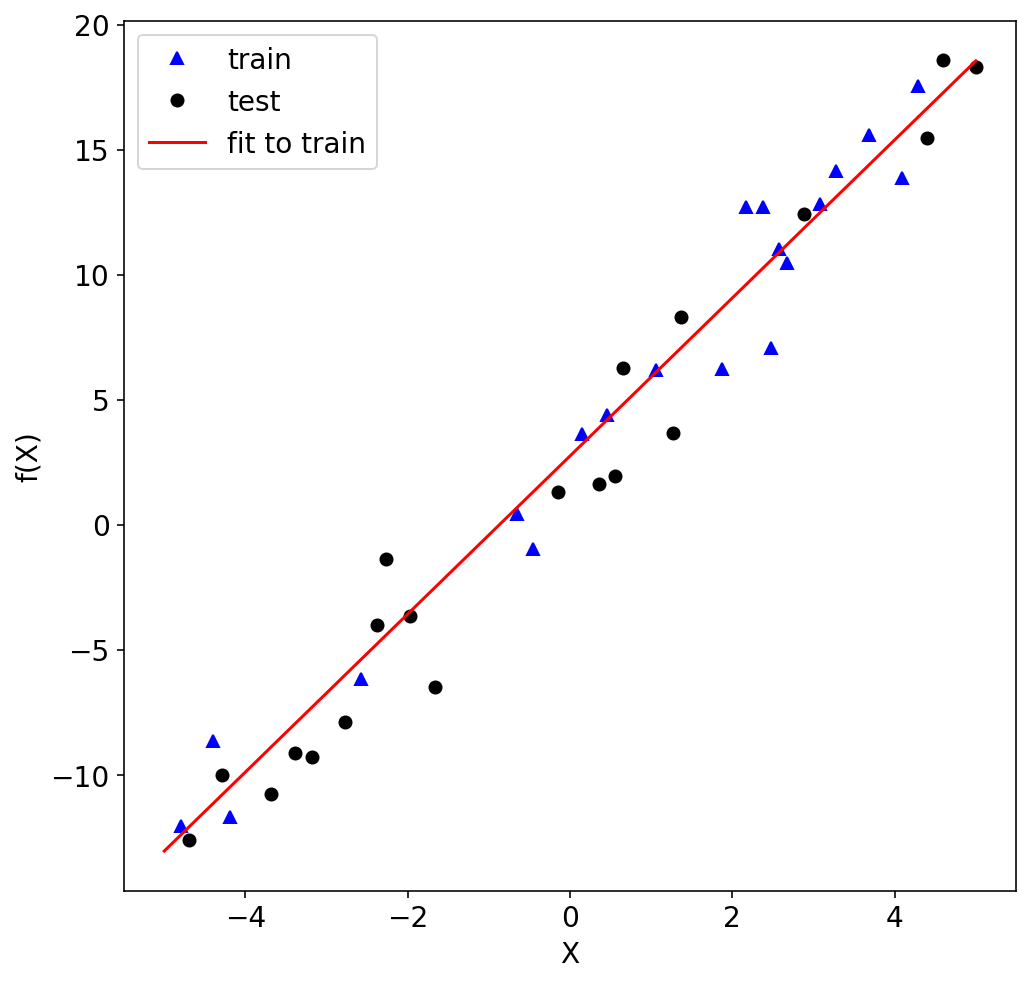

In [14]:
rgr.fit(X_train, y_train)

plt.plot(X_train, y_train, '^b', label='train')
plt.plot(X_test, y_test, 'ok', label='test')
plt.plot(line, rgr.predict(line), '-r', label='fit to train')
plt.legend(loc='best')
plt.xlabel("X")
plt.ylabel("f(X)");

In [15]:
from sklearn.metrics import mean_squared_error

print('MSE train:', mean_squared_error(y_train, rgr.predict(X_train)))
print('MSE test:', mean_squared_error(y_test, rgr.predict(X_test)))

MSE train: 2.76071634643
MSE test: 3.41000524744


(To make the point more clearly experiment with reducing the number of training samples down to two.)

## Model complexity

The regression problem we created above is extremely simple. What if the problem is more complicated? We need a more complex model. Simple problems need simple models, complex problems need complex models.

Let's switch back to our blob dataset and kNN classifier from earlier.

Questions:
* what is the model?
* what is the learning set $\mathcal{L}$?
* what is the loss function $L$?

The kNN model has many parameters that need "fitting" during the training as it memorises the whole dataset. In the case of `n_neighbors=1` it fits one parameter for each training point. As `n_neighbors` increases the number of parameters reduces.

As you **increase** `n_neighbors` you **decrease** the model complexity. When considering only the nearest neighbour your model has as many free parameters as there are training examples. This is a very complex model. At the opposite end of the spectrum a model with `n_neighbors=n_samples` has only one parameter, it will always predict the average of all training examples.

What about the `n_neighbors` parameter? Is that not a parameter? Yes and no. It is not a parameter in the same sense as the $\beta_i$s in a linear model. Instead it is a hyper-parameter, it influences the "kind of model" you are fitting to your data.

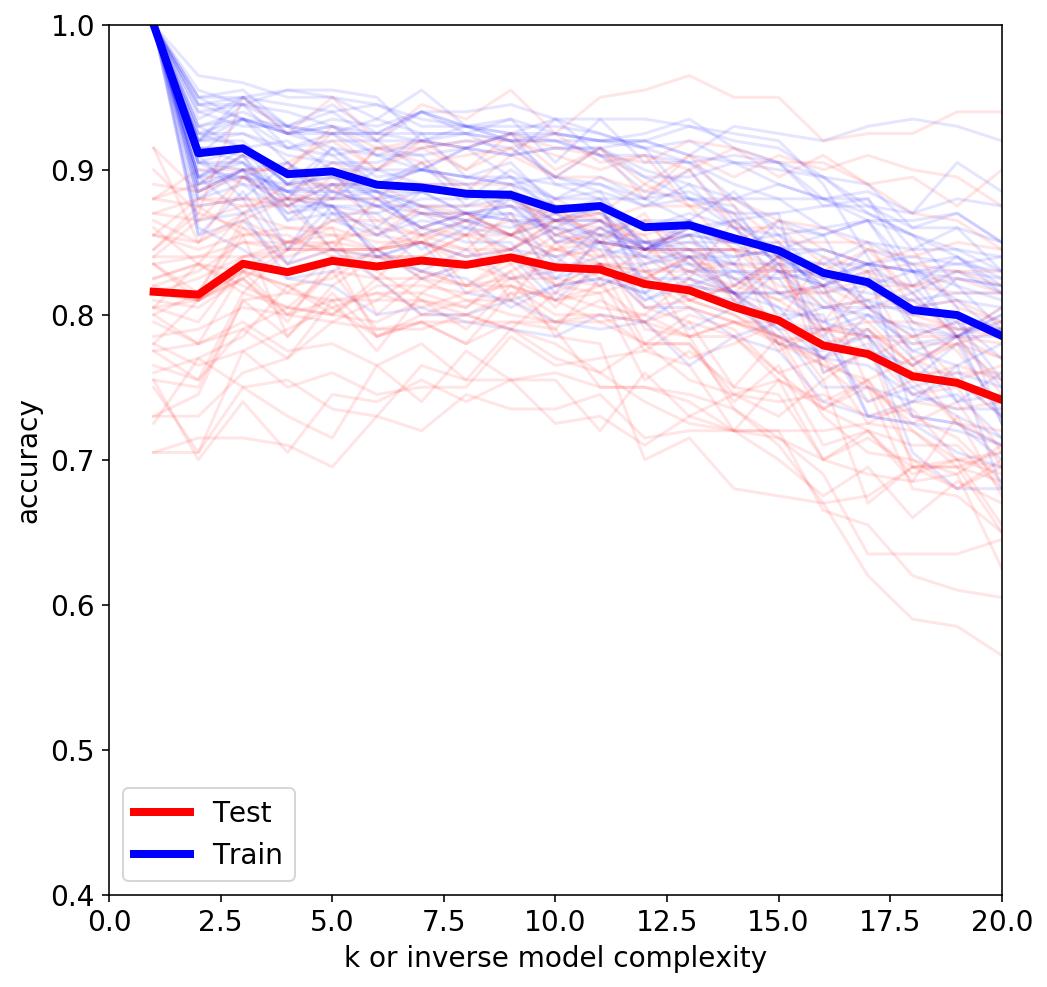

In [16]:
accuracies_test = []
accuracies_train = []
ks = np.arange(1, 21, 1)

for n in range(50):
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y < 10))
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores = []
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(ks, train_scores, c='b', alpha=0.1)
    plt.plot(ks, test_scores, c='r', alpha=0.1)
    
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k or inverse model complexity')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.xlim((0, max(ks)))
plt.ylim((0.4, 1.));

## Bias-Variance trade-off

It can be shown that the best method for making a prediction $\hat y$ at $x$ is to predict the average of all training examples for which $X = x$. When "best" is defined by the average squared error. In practice there is at most one training point at each $x$. In practice this means we settle for:
$$
\hat f(x) = \mathrm{Ave}\left(y_i \mid x_i \in N_k(x)\right)
$$
where $N_k(x)$ is the neighbourhood containing $k$ points from $\mathcal{T}$ nearest to $x$. This is exactly what kNN does. So why not use it always and for everything?

The curse of dimensionality: as the number of dimensions increases you need an exponentially larger number of training samples to keep $k$ constant.

By making assumptions about the (local) shape of the function we are trying to model we can counteract this and get more stable predictions.

Lienar regression assumes that $f(x)$ is well approximated by a globally linear function.

In contrast kNN assumes that $f(x)$ is well approximated by a locally constant function.

The latter is more flexible, but you have to pay a price for this flexibility. If you do not need the flexibility you can obtain a more stable estimate by making more assumptions.

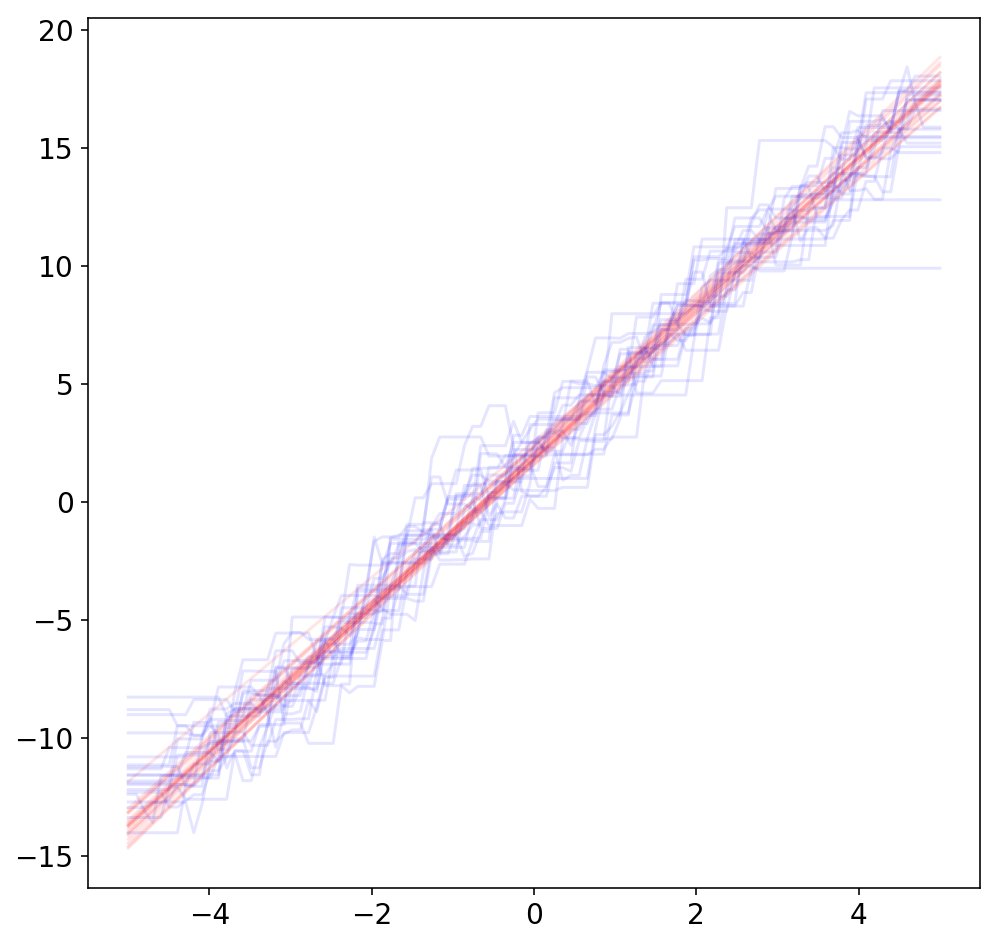

In [17]:
from sklearn.neighbors import KNeighborsRegressor


def make_data():
    x = np.linspace(-5, 5, 1000)
    rng = np.random.RandomState()
    rng.shuffle(x)
    X = np.sort(x[:40])
    y = f(X)

    X = X.reshape(-1, 1)
    return X, y

# show a noisy but linear data set, compare variance of kNN with linear regression

for n in range(20):
    X, y = make_data()
    rgr = LinearRegression()
    rgr.fit(X, y)
    plt.plot(line, rgr.predict(line), '-r', alpha=0.1)
    
    rgr = KNeighborsRegressor(n_neighbors=3)
    rgr.fit(X, y)
    plt.plot(line, rgr.predict(line), '-b', alpha=0.1)

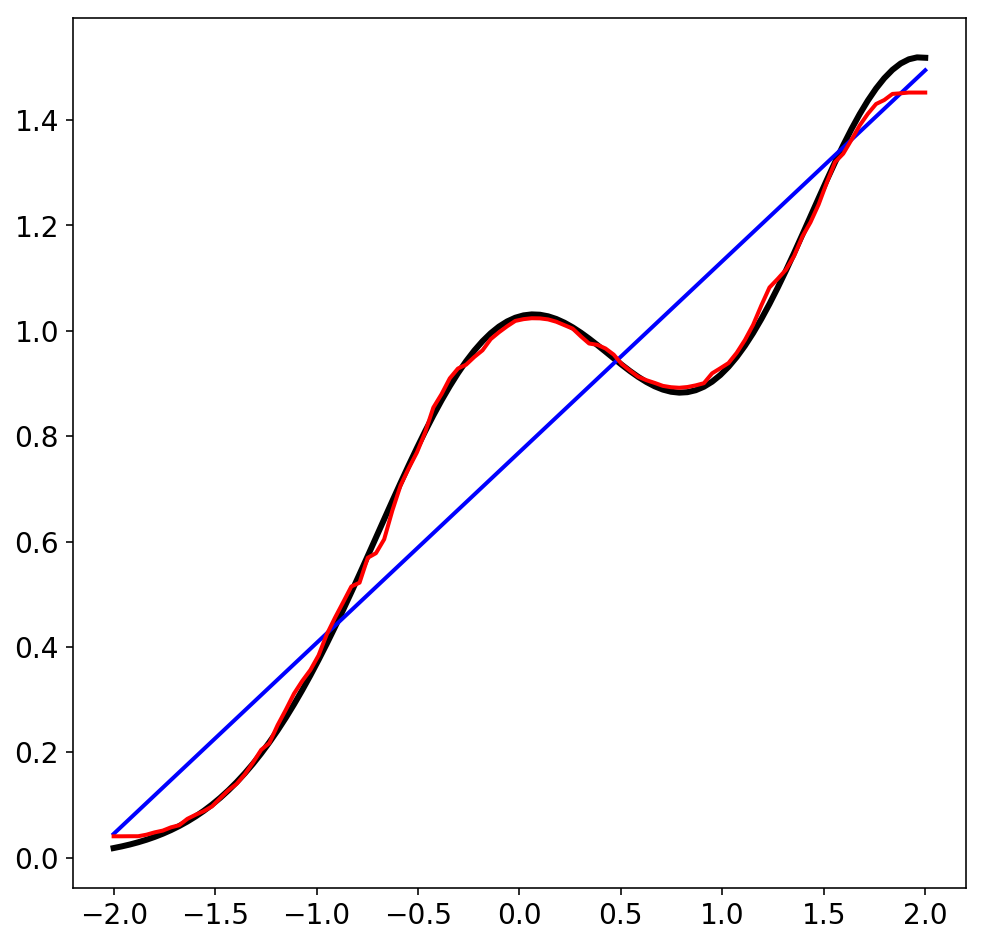

In [18]:
# use a non linear data set, compare bias of kNN with linear regression

def f(x):
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def make_data():
    x = np.linspace(-2, 2, 1000)
    rng = np.random.RandomState()
    rng.shuffle(x)
    X = np.sort(x[:40])
    y = f(X)

    X = X.reshape(-1, 1)
    return X, y

line = np.linspace(-2, 2, 100).reshape(-1, 1)
plt.plot(line, f(line), 'k-', lw=3)
linear = []
knn = []
for n in range(20):
    X, y = make_data()
    rgr = LinearRegression()
    rgr.fit(X, y)
    linear.append(rgr.predict(line))
    
    rgr = KNeighborsRegressor(n_neighbors=3)
    rgr.fit(X, y)
    knn.append(rgr.predict(line))

plt.plot(line, np.array(linear).mean(axis=0), '-b', lw=2)
plt.plot(line, np.array(knn).mean(axis=0), '-r', lw=2);